**Μέλη ομάδας:** <br>
* Λινάρδος Αλέξανδρος, 1115201600093
* Μήλιος Αντώνιος, 1115201600100

In [ ]:
dir = '/content/drive/My Drive/Colab Notebooks/'  # Drive path for directory with csvs

from google.colab import drive
drive.mount('/content/drive')

import sys
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
print('Python version ' + sys.version)
print('Matplotlib version ' + matplotlib.__version__)
print('Numpy version' + np.__version__)
print("---------------------------------------")

df_fake = pd.read_csv(dir+'Fake.csv')
print(df_fake.info())
df_true = pd.read_csv(dir+'True.csv')
print(df_true.info())

Mounted at /content/drive
Python version 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Matplotlib version 3.2.2
Numpy version1.19.5
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


# 1. Προεπεξεργασία / καθάρισμα

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

replace_list = {'…':'', '&':'', '–':'', ';':'', '-':' ', r'\!': '', '\(':'', '\)':'', '\[':'', '\]':'', '“':'', '”':'', '‘': '', '’':'', r'\?': '', ':':'', ',':'', r'\.': '', ' ep ': ' '}

df_fake_edited = df_fake.dropna() # remove rows and columns with Null/NaN values

df_fake_edited['title'] = df_fake_edited['title'].str.lower() # convert to lowercase
df_fake_edited['text'] = df_fake_edited['text'].str.lower()
df_fake_edited['subject'] = df_fake_edited['subject'].str.lower()
df_fake_edited['date'] = df_fake_edited['date'].str.lower()

df_fake_edited = df_fake_edited.replace(replace_list, regex=True) # remove punctuation

df_fake_edited = df_fake_edited.replace({'\s{2,}': ' '}, regex=True) # reduce multiple spaces to single space

# df_fake_edited
df_fake_list=df_fake_edited['title'].tolist()
for string in df_fake_list[7:9]:
  print(string)
print()

# Tokenize and Lemmatize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_fake_edited['title'] = df_fake_edited.title.apply(lemmatize_text)
df_fake_list=df_fake_edited['title'].tolist()
for string in df_fake_list[7:9]:
  print(string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
 trump said some insanely racist stuff inside the oval office and witnesses back it up
 former cia director slams trump over un bullying openly suggests hes acting like a dictator tweet

['trump', 'said', 'some', 'insanely', 'racist', 'stuff', 'inside', 'the', 'oval', 'office', 'and', 'witness', 'back', 'it', 'up']
['former', 'cia', 'director', 'slam', 'trump', 'over', 'un', 'bullying', 'openly', 'suggests', 'he', 'acting', 'like', 'a', 'dictator', 'tweet']


In [ ]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')

replace_list = {'…':'', '&':'', '–':'', ';':'', '-':' ', r'\!': '', '\(':'', '\)':'', '\[':'', '\]':'', '“':'', '”':'', '‘': '', '’':'', r'\?': '', ':':'', ',':'', r'\.': '', ' ep ': ' '}

df_true_edited = df_true.dropna() # remove rows and columns with Null/NaN values

df_true_edited['title'] = df_true_edited['title'].str.lower() # convert to lowercase
df_true_edited['text'] = df_true_edited['text'].str.lower()
df_true_edited['subject'] = df_true_edited['subject'].str.lower()
df_true_edited['date'] = df_true_edited['date'].str.lower()

df_true_edited = df_true_edited.replace(replace_list, regex=True) # remove punctuation

df_true_edited = df_true_edited.replace({'\s{2,}': ' '}, regex=True) # reduce multiple spaces to single space

# df_true_edited
df_true_list=df_true_edited['title'].tolist()
for string in df_true_list[:2]:
  print(string)
print()

# Tokenize and Lemmatize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_true_edited['title'] = df_true_edited.title.apply(lemmatize_text)
df_true_list=df_true_edited['title'].tolist()
for string in df_true_list[:2]:
  print(string)

as us budget fight looms republicans flip their fiscal script
us military to accept transgender recruits on monday pentagon

['a', 'u', 'budget', 'fight', 'loom', 'republican', 'flip', 'their', 'fiscal', 'script']
['u', 'military', 'to', 'accept', 'transgender', 'recruit', 'on', 'monday', 'pentagon']


# 2. Μελέτη δεδομένων

## α.

### Fake News

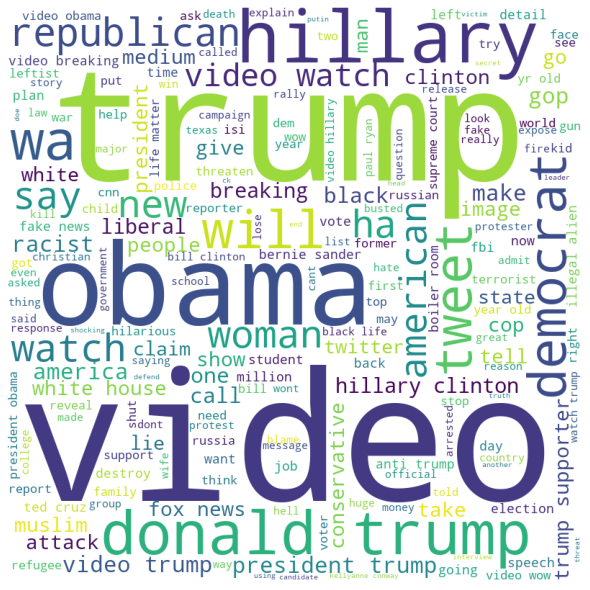

In [ ]:
from wordcloud import WordCloud, STOPWORDS
title_words = ' '
stopwords = set(STOPWORDS)
for index, row in df_fake_edited.iterrows():
    for word in row['title']:
      title_words = title_words + " " + word

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(title_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Real News

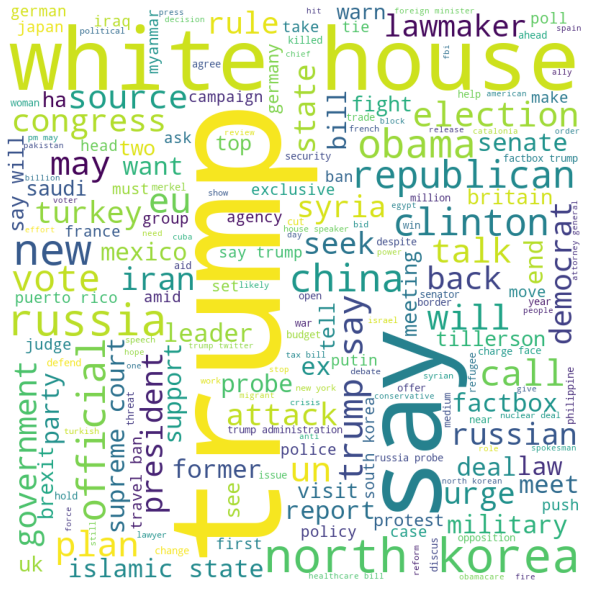

In [ ]:
from wordcloud import WordCloud, STOPWORDS
title_words = ' '
stopwords = set(STOPWORDS)
for index, row in df_true_edited.iterrows():
    for word in row['title']:
      title_words = title_words + " " + word

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(title_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## β.

In [ ]:
fake_title_char_count = []
fake_text_char_count = []
true_title_char_count = []
true_text_char_count = []

for index, row in df_fake.iterrows():
  fake_title_char_count.append(len(df_fake['title'][index]))
  fake_text_char_count.append(len(df_fake['text'][index]))

for index, row in df_true.iterrows():
  true_title_char_count.append(len(df_true['title'][index]))
  true_text_char_count.append(len(df_true['text'][index]))

print(fake_title_char_count)
print(fake_text_char_count)
print(true_title_char_count)
print(true_text_char_count)

[79, 69, 90, 78, 70, 82, 83, 87, 102, 81, 68, 94, 76, 91, 73, 78, 75, 58, 89, 63, 92, 85, 86, 93, 86, 97, 88, 95, 79, 70, 88, 49, 86, 68, 91, 83, 85, 90, 91, 75, 76, 101, 88, 98, 107, 60, 79, 78, 88, 84, 84, 100, 85, 89, 72, 86, 82, 79, 90, 96, 83, 90, 77, 82, 91, 82, 79, 92, 83, 57, 94, 80, 95, 94, 90, 67, 79, 95, 72, 92, 60, 87, 93, 69, 78, 93, 69, 89, 87, 91, 95, 82, 83, 81, 90, 73, 82, 89, 89, 115, 68, 76, 95, 74, 88, 74, 113, 83, 76, 69, 60, 65, 93, 91, 97, 78, 89, 87, 66, 94, 83, 55, 94, 93, 84, 55, 92, 87, 87, 92, 82, 85, 87, 89, 83, 82, 82, 106, 63, 94, 72, 89, 115, 88, 96, 82, 70, 85, 82, 66, 87, 95, 95, 89, 87, 71, 78, 68, 93, 115, 77, 96, 56, 66, 54, 112, 98, 78, 87, 90, 92, 89, 92, 84, 74, 97, 81, 74, 78, 76, 95, 63, 75, 80, 66, 90, 98, 88, 79, 101, 87, 88, 85, 72, 96, 96, 57, 81, 96, 94, 80, 77, 92, 94, 96, 100, 99, 91, 69, 95, 101, 89, 101, 81, 98, 60, 84, 101, 82, 93, 80, 79, 87, 97, 85, 86, 88, 89, 90, 87, 87, 60, 90, 73, 87, 94, 82, 88, 64, 94, 76, 86, 93, 85, 77, 85, 

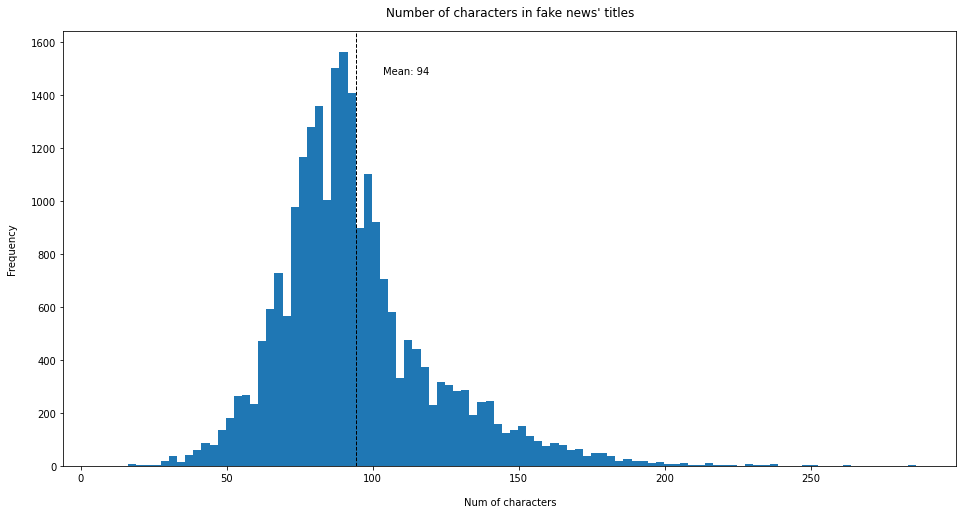

In [ ]:
df1 = pd.DataFrame(fake_title_char_count)
plt.figure(figsize=(16,8))
plt.hist(df1[0],  bins=100)
plt.axvline(df1[0].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1[0].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(df1[0].mean()))
plt.ylabel("Frequency", labelpad=14)
plt.xlabel("Num of characters", labelpad=14)
plt.title("Number of characters in fake news' titles", y=1.02);

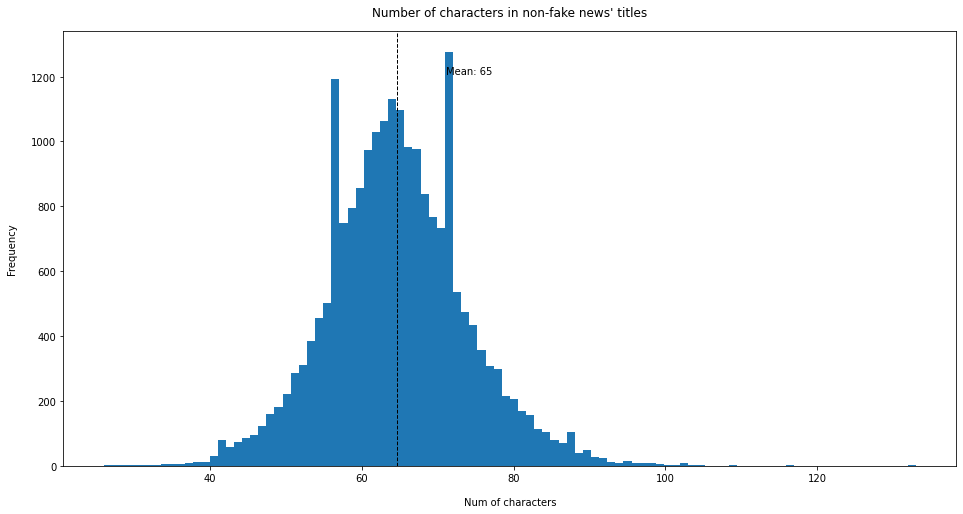

In [ ]:
df1 = pd.DataFrame(true_title_char_count)
plt.figure(figsize=(16,8))
plt.hist(df1[0],  bins=100)
plt.axvline(df1[0].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1[0].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(df1[0].mean()))
plt.ylabel("Frequency", labelpad=14)
plt.xlabel("Num of characters", labelpad=14)
plt.title("Number of characters in non-fake news' titles", y=1.02);

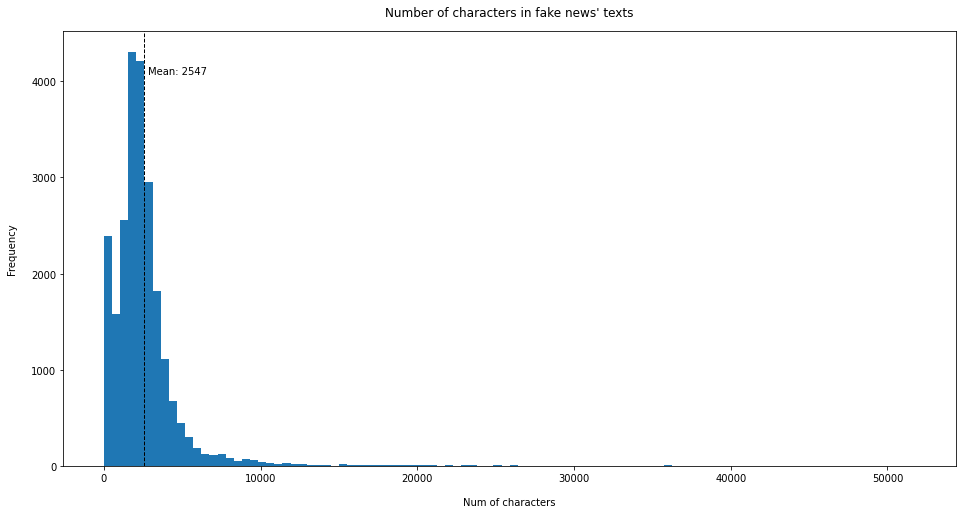

In [ ]:
df1 = pd.DataFrame(fake_text_char_count)
plt.figure(figsize=(16,8))
plt.hist(df1[0],  bins=100)
plt.axvline(df1[0].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1[0].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(df1[0].mean()))
plt.ylabel("Frequency", labelpad=14)
plt.xlabel("Num of characters", labelpad=14)
plt.title("Number of characters in fake news' texts", y=1.02);

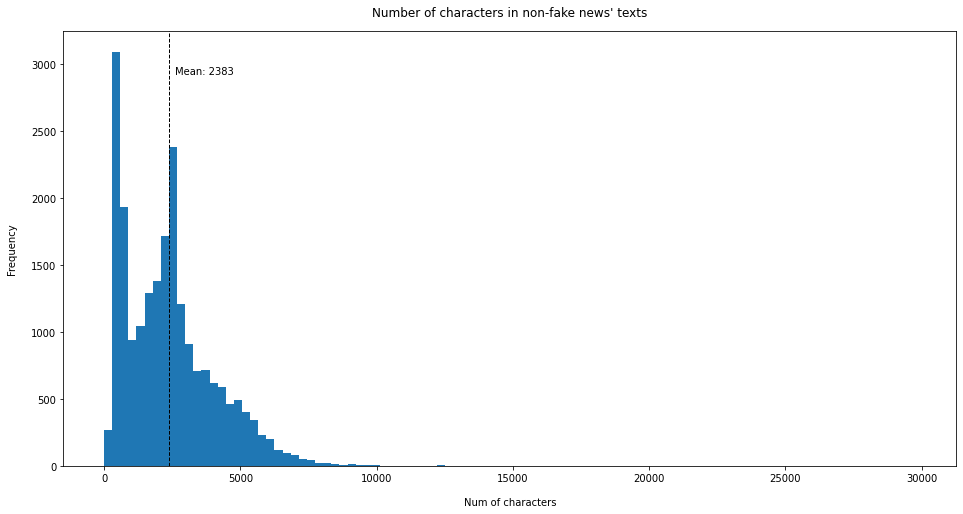

In [ ]:
df1 = pd.DataFrame(true_text_char_count)
plt.figure(figsize=(16,8))
plt.hist(df1[0],  bins=100)
plt.axvline(df1[0].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df1[0].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(df1[0].mean()))
plt.ylabel("Frequency", labelpad=14)
plt.xlabel("Num of characters", labelpad=14)
plt.title("Number of characters in non-fake news' texts", y=1.02);

Παρατηρούμε ότι τα fake news έχουν κατα μέσο όρο πολύ μεγαλύτερους τίτλους απο τα non-fake news καθώς και μεγαλύτερα κείμενα.

## γ.

###Fake News

In [ ]:
fake_title_words = []
for title in df_fake_list: 
  fake_title_words.append(len(title))

fake_text_tokens = df_fake_edited.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

fake_text_words = []
for text in fake_text_tokens:
  fake_text_words.append(len(text))

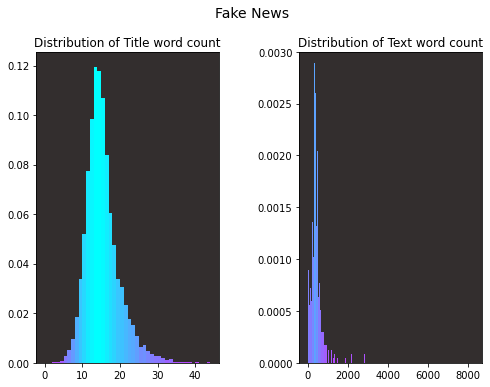

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))
fig.suptitle('Fake News', fontsize=14)
fig.tight_layout(pad=5.0)
ax1.set_facecolor('#332e2e')  
ax2.set_facecolor('#332e2e')
ax1.set_title('Distribution of Title word count')  
ax2.set_title('Distribution of Text word count')
max_title_words = max(fake_title_words)
max_text_words = max(fake_text_words)
n1, bins1, patches1 = ax1.hist(fake_title_words, bins=range(max_title_words+1), density=True, facecolor='pink')
fracs1 = ((n1**(1 / 5)) / n1.max())
n2, bins2, patches2 = ax2.hist(fake_text_words, bins=range(max_text_words+1), density=True, facecolor='pink')
ax2.set_ylim([0, 0.003]) 
fracs2 = ((n2**(1 / 5)) / n2.max())
norm1 = matplotlib.colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1): 
    color = plt.cm.cool_r(norm1(thisfrac)) 
    thispatch.set_facecolor(color)
norm2 = matplotlib.colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2): 
    color = plt.cm.cool_r(norm2(thisfrac)) 
    thispatch.set_facecolor(color) 

### Real News

In [ ]:
true_title_words = []
for title in df_true_list: 
  true_title_words.append(len(title))

true_text_tokens = df_true_edited.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

true_text_words = []
for text in true_text_tokens:
  true_text_words.append(len(text))

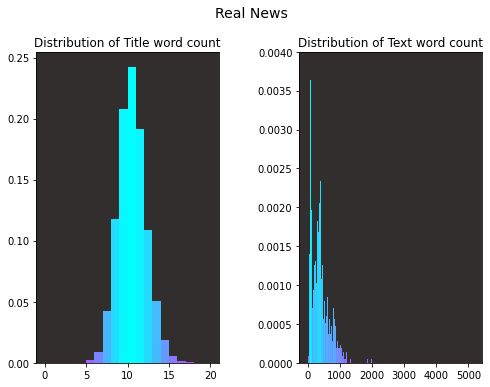

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))
fig.suptitle('Real News', fontsize=14)
fig.tight_layout(pad=5.0)
ax1.set_facecolor('#332e2e')  
ax2.set_facecolor('#332e2e')
ax1.set_title('Distribution of Title word count')  
ax2.set_title('Distribution of Text word count')
max_title_words = max(true_title_words)
max_text_words = max(true_text_words)
n1, bins1, patches1 = ax1.hist(true_title_words, bins=range(max_title_words+1), density=True, facecolor='pink')
fracs1 = ((n1**(1 / 5)) / n1.max())
n2, bins2, patches2 = ax2.hist(true_text_words, bins=range(max_text_words+1), density=True, facecolor='pink')
ax2.set_ylim([0, 0.004]) 
fracs2 = ((n2**(1 / 5)) / n2.max())
norm1 = matplotlib.colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1): 
    color = plt.cm.cool_r(norm1(thisfrac)) 
    thispatch.set_facecolor(color)
norm2 = matplotlib.colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2): 
    color = plt.cm.cool_r(norm2(thisfrac)) 
    thispatch.set_facecolor(color) 

## δ.

### Fake News (no stopwords)

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stops = set(stopwords.words('english'))

filtered_fake_titles = []
for title in df_fake_list:
  filtered_title = []
  for word in title:
    if word not in en_stops:
      filtered_title.append(word)
  filtered_fake_titles.append(filtered_title)

filtered_fake_texts = []
for text in fake_text_tokens:
  filtered_text = []
  for word in text:
    if word not in en_stops:
      filtered_text.append(word)
  filtered_fake_texts.append(filtered_text)

filtered_titles_words = []
for title in filtered_fake_titles:
  filtered_titles_words.append(len(title))

filtered_texts_words = []
for text in filtered_fake_texts:
  filtered_texts_words.append(len(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


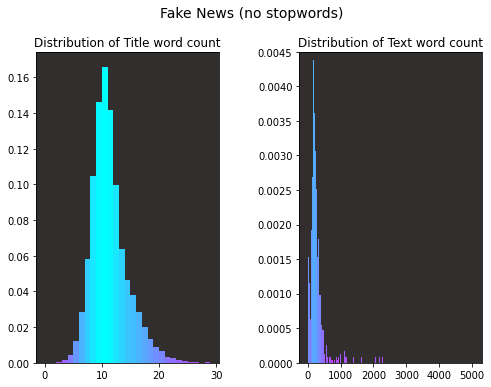

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))
fig.suptitle('Fake News (no stopwords)', fontsize=14)
fig.tight_layout(pad=5.0)
ax1.set_facecolor('#332e2e')  
ax2.set_facecolor('#332e2e')
ax1.set_title('Distribution of Title word count')  
ax2.set_title('Distribution of Text word count')
max_title_words = max(filtered_titles_words)
max_text_words = max(filtered_texts_words)
n1, bins1, patches1 = ax1.hist(filtered_titles_words, bins=range(max_title_words+1), density=True, facecolor='pink')
fracs1 = ((n1**(1 / 5)) / n1.max())
n2, bins2, patches2 = ax2.hist(filtered_texts_words, bins=range(max_text_words+1), density=True, facecolor='pink')
ax2.set_ylim([0, 0.0045]) 
fracs2 = ((n2**(1 / 5)) / n2.max())
norm1 = matplotlib.colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1): 
    color = plt.cm.cool_r(norm1(thisfrac)) 
    thispatch.set_facecolor(color)
norm2 = matplotlib.colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2): 
    color = plt.cm.cool_r(norm2(thisfrac)) 
    thispatch.set_facecolor(color) 

### Real News (no stopwords)

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stops = set(stopwords.words('english'))

filtered_true_titles = []
for title in df_true_list:
  filtered_title = []
  for word in title:
    if word not in en_stops:
      filtered_title.append(word)
  filtered_true_titles.append(filtered_title)

filtered_true_texts = []
for text in true_text_tokens:
  filtered_text = []
  for word in text:
    if word not in en_stops:
      filtered_text.append(word)
  filtered_true_texts.append(filtered_text)

filtered_titles_words = []
for title in filtered_true_titles:
  filtered_titles_words.append(len(title))

filtered_texts_words = []
for text in filtered_true_texts:
  filtered_texts_words.append(len(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


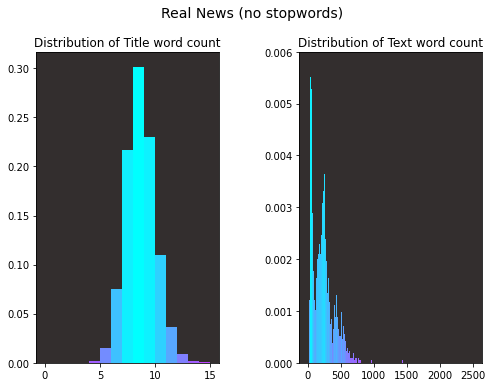

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))
fig.suptitle('Real News (no stopwords)', fontsize=14)
fig.tight_layout(pad=5.0)
ax1.set_facecolor('#332e2e')  
ax2.set_facecolor('#332e2e')
ax1.set_title('Distribution of Title word count')  
ax2.set_title('Distribution of Text word count')
max_title_words = max(filtered_titles_words)
max_text_words = max(filtered_texts_words)
n1, bins1, patches1 = ax1.hist(filtered_titles_words, bins=range(max_title_words+1), density=True, facecolor='pink')
fracs1 = ((n1**(1 / 5)) / n1.max())
n2, bins2, patches2 = ax2.hist(filtered_texts_words, bins=range(max_text_words+1), density=True, facecolor='pink')
ax2.set_ylim([0, 0.006]) 
fracs2 = ((n2**(1 / 5)) / n2.max())
norm1 = matplotlib.colors.Normalize(fracs1.min(), fracs1.max())
for thisfrac, thispatch in zip(fracs1, patches1): 
    color = plt.cm.cool_r(norm1(thisfrac)) 
    thispatch.set_facecolor(color)
norm2 = matplotlib.colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2): 
    color = plt.cm.cool_r(norm2(thisfrac)) 
    thispatch.set_facecolor(color) 

## ε.

### Fake News (Texts)

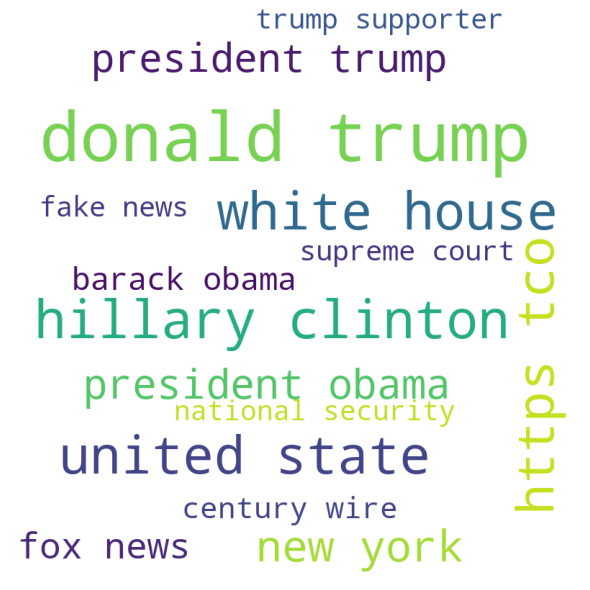

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

WNL = nltk.WordNetLemmatizer()
text = ' '

for index, row in df_fake_edited.iterrows():
    text=text+ row['text']

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

#set the stopwords list
stopwords_wc = set(STOPWORDS)
customized_words = ['years', 'old', 'via', 'will'] # remove any particular word form text which does not contribute much in meaning

#remove stop words
new_stopwords = stopwords_wc.union(customized_words)
text_content = [word for word in text1 if word not in new_stopwords]

# Remove empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Get the lemmas of each word to make similar words match
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#Generating wordcloud
words_dict = dict(words_freq)
wordCloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,
            max_words=15, # top 15 bigrams by frequency
            stopwords=new_stopwords).generate_from_frequencies(words_dict)

# plot the WordCloud image                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

### Fake News (Titles)

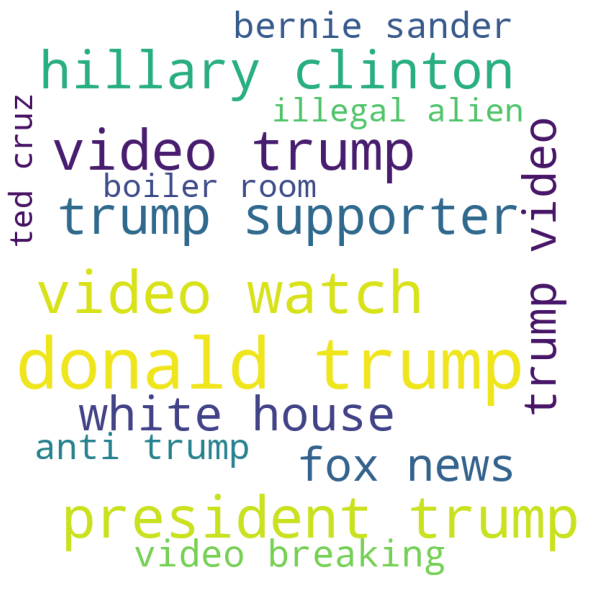

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

WNL = nltk.WordNetLemmatizer()
text = ' '

for index, row in df_fake_edited.iterrows():
    for word in row['title']:
      text = text + " " + word

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

#set the stopwords list
stopwords_wc = set(STOPWORDS)
customized_words = ['years', 'old', 'via', 'will'] # remove any particular word form text which does not contribute much in meaning

#remove stop words
new_stopwords = stopwords_wc.union(customized_words)
text_content = [word for word in text1 if word not in new_stopwords]

# Remove empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Get the lemmas of each word to make similar words match
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#Generating wordcloud
words_dict = dict(words_freq)
wordCloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,
            max_words=15, # top 15 bigrams by frequency
            stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

# plot the WordCloud image                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Real News (Texts)

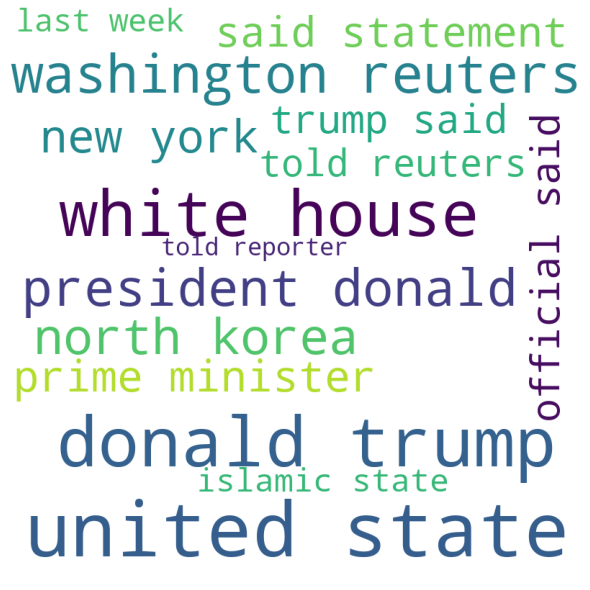

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

WNL = nltk.WordNetLemmatizer()
text = ' '

for index, row in df_true_edited.iterrows():
    text=text+ row['text']

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

#set the stopwords list
stopwords_wc = set(STOPWORDS)
customized_words = ['years', 'old', 'via', 'will'] # remove any particular word form text which does not contribute much in meaning

#remove stop words
new_stopwords = stopwords_wc.union(customized_words)
text_content = [word for word in text1 if word not in new_stopwords]

# Remove empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Get the lemmas of each word to make similar words match
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#Generating wordcloud
words_dict = dict(words_freq)
wordCloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,
            max_words=15, # top 15 bigrams by frequency
            stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

# plot the WordCloud image                 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Real News (Titles)

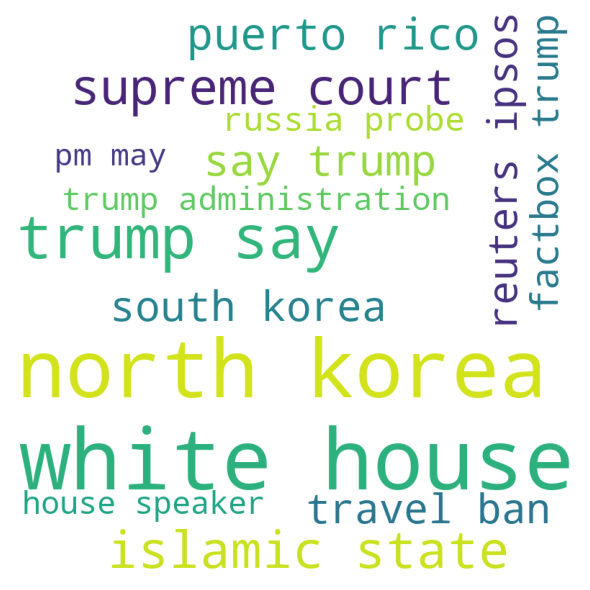

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

WNL = nltk.WordNetLemmatizer()
text = ' '

for index, row in df_true_edited.iterrows():
    for word in row['title']:
      text = text + " " + word

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

#set the stopwords list
stopwords_wc = set(STOPWORDS)
customized_words = ['years', 'old', 'via', 'will'] # remove any particular word form text which does not contribute much in meaning

#remove stop words
new_stopwords = stopwords_wc.union(customized_words)
text_content = [word for word in text1 if word not in new_stopwords]

# Remove empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Get the lemmas of each word to make similar words match
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#Generating wordcloud
words_dict = dict(words_freq)
wordCloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10,
            max_words=15, # top 15 bigrams by frequency
            stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

# plot the WordCloud image                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# 3. Δημιουργία συνόλου εκμάθησης και δοκιμής

In [ ]:
df_fake['label'] = 0
train_fake = df_fake[:19000]
test_fake = df_fake[19000:]

df_true['label'] = 1
train_true = df_true[:18000]
test_true = df_true[18000:]

df_train = train_fake.append(train_true, ignore_index=True)
df_test = test_fake.append(test_true, ignore_index=True)

print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37000 entries, 0 to 36999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    37000 non-null  object
 1   text     37000 non-null  object
 2   subject  37000 non-null  object
 3   date     37000 non-null  object
 4   label    37000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7898 entries, 0 to 7897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    7898 non-null   object
 1   text     7898 non-null   object
 2   subject  7898 non-null   object
 3   date     7898 non-null   object
 4   label    7898 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 308.6+ KB
None


In [ ]:
# Edit path for Drive directory to store new csvs
dir_to_store = '/content/drive/My Drive/Colab Notebooks/'

df_train.to_csv(dir_to_store+'train.csv', index=False)
df_test.to_csv(dir_to_store+'test.csv', index=False)

# 4. Υλοποίηση Κατηγοριοποίησης (Classification)

In [ ]:
dir = '/content/drive/My Drive/Colab Notebooks/'  # Drive path for directory with csvs
from sklearn.metrics import f1_score

def get_percent(percent):
  df_train = pd.read_csv(dir+'train.csv')
  df_test = pd.read_csv(dir+'test.csv')
  # Calculate the <percent>% of rows for each dataframe
  train_sub_count = int(len(df_train.index)*percent/100)
  test_sub_count = int(len(df_test.index)*percent/100)

  # Shuffle the dataframes
  df_train_shuffle = df_train.sample(frac=1).reset_index(drop=True)
  df_test_shuffle = df_test.sample(frac=1).reset_index(drop=True)

  # Now we can take a subset that represents the original
  df_train_subset = df_train_shuffle[:train_sub_count]
  df_test_subset = df_test_shuffle[:test_sub_count]

  return df_train_subset, df_test_subset

df_train_subset, df_test_subset = get_percent(10)
df_train_subset

,title,text,subject,date,label
0,SAY WHAT?! Muslim Women Can Now Cover Their Fa...,"Soooo ah, what s the point of the picture?Not ...",politics,"Sep 11, 2015",0
1,SC STATE REP Who is a Former Cop Proposes Smar...,WHO BETTER THAN A FORMER POLICE OFFICER TO UND...,politics,15-Feb-18,0
2,Trump’s Involvement In Houston Chemical Plant...,In the aftermath of the historic flooding that...,News,"September 1, 2017",0
3,Ted Cruz Names Who He’ll Pick As Ambassador T...,Sometimes you could wonder if some of the peop...,News,"February 19, 2016",0
4,"Short-term government funding, disaster aid bi...",WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"December 21, 2017",1
...,...,...,...,...,...
3695,KARMA: Conservative Group’s Plan To Sabotage ...,Thanks to a conservative group that tried to r...,News,"February 18, 2016",0
3696,CROOKED HILLARY’S Campaign Manager Won’t Rule ...,Mere months after being on the receiving end o...,left-news,"Mar 22, 2017",0
3697,Detained journalists informed Myanmar of filmi...,YANGON (Reuters) - Turkey s state broadcaster ...,worldnews,"November 1, 2017",1
3698,Fox News And Rudy Giuliani Fully Brought Out ...,"How does the saying go? Fox News: Not racist, ...",News,"February 8, 2016",0


### 1. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def make_BoWs(df_train_subset, df_test_subset, features=200):
  cvec = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.9 ,max_features=features)
  cbow = cvec.fit_transform(df_train_subset['text'])
  cbow_test = cvec.fit_transform(df_test_subset['text'])

  tfvec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.9, max_features=features)
  tfbow = tfvec.fit_transform(df_train_subset['text'])
  tfbow_test = tfvec.fit_transform(df_test_subset['text'])
  
  return cbow, cbow_test, tfbow, tfbow_test

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

df_train_subset, df_test_subset = get_percent(100)
cbow, cbow_test, tfbow, tfbow_test = make_BoWs(df_train_subset, df_test_subset, features=200)

model = LogisticRegression(max_iter=1000)
model2=model

model.fit(cbow, df_train_subset['label'])
accuracy = model.score(cbow_test, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(cbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' C F1 score =  %f' % f1)

model2.fit(tfbow, df_train_subset['label'])
accuracy = model2.score(tfbow_test, df_test_subset['label'])
print(" TF accuracy = ", accuracy * 100, "%")
weighted_prediction = model2.predict(tfbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' TF F1 score =  %f' % f1)

 C accuracy =  78.6654849328944 %
 C F1 score =  0.723453
 TF accuracy =  76.65231704228918 %
 TF F1 score =  0.720012


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
cbow, cbow_test, tfbow, tfbow_test = make_BoWs(df_train_subset, df_test_subset, features=200)

model = MultinomialNB()

model.fit(cbow, df_train_subset['label'])
accuracy = model.score(cbow_test, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(cbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' C F1 score =  %f' % f1)

model.fit(tfbow, df_train_subset['label'])
accuracy = model.score(tfbow_test, df_test_subset['label'])
print(" TF accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(tfbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' TF F1 score =  %f' % f1)

 C accuracy =  55.68498354013675 %
 C F1 score =  0.543319
 TF accuracy =  53.557862750063315 %
 TF F1 score =  0.488709


#### Support Vector Machines 

In [ ]:
from sklearn import svm

df_train_subset, df_test_subset = get_percent(40)
cbow, cbow_test, tfbow, tfbow_test = make_BoWs(df_train_subset, df_test_subset, features=200)

default_model = svm.SVC()

default_model.fit(cbow, df_train_subset['label'])
accuracy = default_model.score(cbow_test, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = default_model.predict(cbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction, average="weighted")
print(' C F1 score =  %f' % f1)

default_model.fit(tfbow, df_train_subset['label'])
accuracy = default_model.score(tfbow_test, df_test_subset['label'])
print(" TF accuracy = ", accuracy * 100, "%")
weighted_prediction = default_model.predict(tfbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction, average="weighted")
print(' F1 score =  %f' % f1)

 C accuracy =  52.200063311174425 %
 C F1 score =  0.447241
 TF accuracy =  49.351060462171574 %
 F1 score =  0.424582


Θα δοκιμάσουμε και το linear kernel του SVM καθώς θεωρείται ιδανικότερο για text classification.

In [ ]:
from sklearn import svm

linear_model = svm.SVC(kernel='linear', C=100)

linear_model.fit(cbow, df_train_subset['label'])
accuracy = linear_model.score(cbow_test, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = linear_model.predict(cbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction, average="weighted")
print(' C F1 score =  %f' % f1)

linear_model.fit(tfbow, df_train_subset['label'])
accuracy = linear_model.score(tfbow_test, df_test_subset['label'])
print(" TF accuracy = ", accuracy * 100, "%")
weighted_prediction = linear_model.predict(tfbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction, average="weighted")
print(' F1 score =  %f' % f1)

 C accuracy =  49.952516619183285 %
 C F1 score =  0.415260
 TF accuracy =  46.280468502690724 %
 F1 score =  0.409760


#### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df_train_subset, df_test_subset = get_percent(100)
cbow, cbow_test, tfbow, tfbow_test = make_BoWs(df_train_subset, df_test_subset, features=200)

model = RandomForestClassifier(max_depth=10, random_state=0)

model.fit(cbow, df_train_subset['label'])
accuracy = model.score(cbow_test, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(cbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' C F1 score =  %f' % f1)

model.fit(tfbow, df_train_subset['label'])
accuracy = model.score(tfbow_test, df_test_subset['label'])
print(" TF accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(tfbow_test)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' F1 score =  %f' % f1)

 C accuracy =  93.2134717650038 %
 C F1 score =  0.918615
 TF accuracy =  92.8336287667764 %
 F1 score =  0.913509


## 2.

Θα χρησιμοποιήσουμε το glove-twitter-25 επειδή θεωρήσαμε ότι η γλώσσα που χρησιμοποιείται στο twitter θα συνάδει με αυτή τον ειδησεογραφικών άρθρων και εξάλλου τα περισσότερα ειδησεογραφικά site και εφημερίδες ανεβάζουν τα άρθρα τους και στο twitter.

In [ ]:
import gensim.downloader as api

glove_vectors = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
len(glove_vectors[['smile', 'more']])

2

In [ ]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in glove_vectors.vocab]
    if len(doc) > 0:
      return np.mean(glove_vectors[doc], axis=0)
    else:
      return np.zeros(25, dtype=np.float32)

### Logistic Regression

In [ ]:
df_train_subset, df_test_subset = get_percent(100)

df_train_subset['doc_vector'] = df_train_subset.text.apply(document_vector)
df_test_subset['doc_vector'] = df_test_subset.text.apply(document_vector)

In [ ]:
from sklearn.linear_model import LogisticRegression

train_list = list(df_train_subset['doc_vector'])
test_list = list(df_test_subset['doc_vector'])

clf = LogisticRegression(C=100, max_iter=10000)
clf.fit(train_list, df_train_subset['label'])

accuracy = clf.score(test_list, df_test_subset['label'])
print("accuracy = ", accuracy * 100, "%")

weighted_prediction = clf.predict(test_list)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' F1 score =  %f' % f1)

accuracy =  76.25981261078753 %
 F1 score =  0.710782


### Naive Bayes

In [ ]:
# No need to run this cell if you want the same percentage as the previous one
df_train_subset, df_test_subset = get_percent(100)

df_train_subset['doc_vector'] = df_train_subset.text.apply(document_vector)
df_test_subset['doc_vector'] = df_test_subset.text.apply(document_vector)

In [ ]:
from sklearn.naive_bayes import GaussianNB

train_list = list(df_train_subset['doc_vector'])
test_list = list(df_test_subset['doc_vector'])

clf = GaussianNB()
clf.fit(train_list, df_train_subset['label'])

accuracy = clf.score(test_list, df_test_subset['label'])
print("accuracy = ", accuracy * 100, "%")

weighted_prediction = clf.predict(test_list)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' F1 score =  %f' % f1)

accuracy =  48.21473790833122 %
 F1 score =  0.616682


### Support Vector Machines

In [ ]:
# No need to run this cell if you want the same percentage as the previous one
df_train_subset, df_test_subset = get_percent(100)

df_train_subset['doc_vector'] = df_train_subset.text.apply(document_vector)
df_test_subset['doc_vector'] = df_test_subset.text.apply(document_vector)

In [ ]:
from sklearn.svm import SVC

train_list = list(df_train_subset['doc_vector'])
test_list = list(df_test_subset['doc_vector'])

clf = SVC(C=100, kernel='linear')
clf.fit(train_list, df_train_subset['label'])

accuracy = clf.score(test_list, df_test_subset['label'])
print("accuracy = ", accuracy * 100, "%")
weighted_prediction = clf.predict(test_list)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' F1 score =  %f' % f1)

accuracy =  77.20942010635603 %
 F1 score =  0.721879


### Random Forests

In [ ]:
# No need to run this cell if you want the same percentage as the previous one
df_train_subset, df_test_subset = get_percent(100)

df_train_subset['doc_vector'] = df_train_subset.text.apply(document_vector)
df_test_subset['doc_vector'] = df_test_subset.text.apply(document_vector)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_list = list(df_train_subset['doc_vector'])
test_list = list(df_test_subset['doc_vector'])

clf = RandomForestClassifier()
clf.fit(train_list, df_train_subset['label'])

accuracy = clf.score(test_list, df_test_subset['label'])
print("accuracy = ", accuracy * 100, "%")
weighted_prediction = clf.predict(test_list)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' F1 score =  %f' % f1)

accuracy =  78.43757913395797 %
 F1 score =  0.755351


Παρατηρήσεις:

1) Random Forests: 
Πολύ υψηλό accuracy και αναμενόμενο καθώς είναι ο πιο advanced απο τους 4 αλγορίθμους προσομοιώνοντας κάπως neural networks.
Το γεγονός ότι συνδυάζει πολλά δέντρα αποφάσεων βοηθάει τα αποτελέσματα καθώς κάνει regularize. Πολλοί "μέτριοι" classifiers συνδυασμένοι έχουν ως αποτέλεσμα έναν πολύ καλό classifier. Το γεγονός ότι δεν χαλάει χρόνο και computational power
στο για να κάνει optimal αποφάσεις αλλά εμπεριέχει κάποιο randomness βοηθάει τόσο στο χρόνο όσο και στα αποτελέσματα.

2) Logistic Regression:
Γρήγορος, καλό accuracy. Μπορούμε να πούμε ότι προσωμοιώνει ένα single neuron απο neural network.

3) Naive Bayes:
Όχι καλό accuracy. Απλός αλλά ίσως λίγο απαρχαιωμένος.

4) SVM:
Αργεί πολύ και χρειάζεται πολύ optimization. 
Λόγω του μεγάλου χρόνου χρησιμοποιούμε μικρό υποσύνολο των train και test datasets αφού πρώτα έχουμε κάνει shuffle τις εγγραφές τους.
Η τυχαιότητα στην επιλογή αυτή των υποσυνόλων μας δίνει inconsistent αποτελέσματα, 
Accuracy: άλλες φορές καλό accuracy, άλλες κακό.
Το inconsistency αυτό δεν οφείλεται στον αλγόριθμο φυσικά αλλά ο χρόνος που χρειάζεται δεν μας επιτρέπει να κάνουμε εύκολα πιο consistent δοκιμές.
F1 score: χρησιμοποιούμε το average="weighted" όρισμα για να "αντιμετωπίσουμε" πιθανώς σημαντικό imbalance στα δεδομένα λόγω της τυχαιότητας.

Χρησιμοποιώντας την word2vec αναπαράσταση ο χρόνος μειώνεται σημαντικά ώστε να μπορούμε να χρησιμοποιήσουμε το 100% των train και test όπου τα δεδομένα είναι σχετικά balanced γιατί δεν εμπεριέχεται τυχαιότητα. Σε αυτήν την περίπτωη ο SVM πετυχαίνει καλό accuracy και καλό f1 score.

ACCURACY - F1_SCORE
Το accuracy είναι μια απλή και ευκατανόητη μετρική η οποία ωστόσο δεν λαμβάνει υπόψιν το πως κατανέμονται τα δεδομένα στις κλάσεις
Το F1 score σε αντίθεση δίνει καλύτερο depiction στην περίπτωσή μας που η κατανομή των δεδομένων στις κλάσεις είναι ελαφρώς imbalanced.
Στη πλειονότητα των περιπτώσεων μάλιστα τα δεδομένα είναι imbalanced οπότε το F1 score είναι πολύ χρήσιμη μετρική γενικότερα.
Επίσης το F1 score ποσοτικοποιεί καλύτερα την αστοχία στη κατηγοριοποίηση.

WORD2VEC - COUNT VECTORIZER, TF-IDF
Το word2vec δίνει πολύ πιο γρήγορες υλοποιήσεις ωστόσο οι μετρικές δείχνουν λίγο μικρότερη επιτυχία στην κατηγοριοποίηση απο τους αλγορίθμους. Ειδικά στον Random Forests.

# 5. Beat the Benchmark

Θα πάρουμε τον καλύτερο classifier μας και θα προσπαθήσουμε να τον βελτιώσουμε μέσω preprocessing και αυξάνοντας τον αριθμό των decision trees.

In [ ]:
df_train_subset, df_test_subset = get_percent(100)
cbow, cbow_test, tfbow, tfbow_test = make_BoWs(df_train_subset, df_test_subset, features=200)

In [ ]:
print(cbow[0])

  (0, 185)	1
  (0, 140)	1
  (0, 131)	1
  (0, 48)	1
  (0, 171)	2
  (0, 133)	1
  (0, 17)	3
  (0, 145)	1
  (0, 168)	2
  (0, 74)	2
  (0, 28)	3
  (0, 61)	1
  (0, 167)	1
  (0, 165)	1
  (0, 52)	1
  (0, 128)	1
  (0, 97)	1
  (0, 79)	1
  (0, 186)	1
  (0, 132)	1
  (0, 49)	1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

ctrain_t = scaler.fit_transform(cbow)
ctest_t = scaler.fit_transform(cbow_test)

print(ctrain_t[0])

  (0, 17)	2.1915107172024504
  (0, 28)	3.4551995329929373
  (0, 48)	0.9166345822373352
  (0, 49)	0.9924030956944346
  (0, 52)	2.066241537749116
  (0, 61)	1.615776700201922
  (0, 74)	1.3242837632322855
  (0, 79)	1.148067963525193
  (0, 97)	1.3737345274560926
  (0, 128)	1.2406103333849527
  (0, 131)	0.491974839866299
  (0, 132)	2.5833384735184737
  (0, 133)	1.2831290652636023
  (0, 140)	1.0805871919253562
  (0, 145)	0.2910889893741658
  (0, 165)	1.1232720755660948
  (0, 167)	2.0192541168973315
  (0, 168)	2.191324720428682
  (0, 171)	0.4032063489193627
  (0, 185)	1.187765743977564
  (0, 186)	2.634845205451052


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300 ,max_depth=10, random_state=0)

model.fit(ctrain_t, df_train_subset['label'])
accuracy = model.score(ctest_t, df_test_subset['label'])
print(" C accuracy = ", accuracy * 100, "%")
weighted_prediction = model.predict(ctest_t)
f1 = f1_score(df_test_subset['label'], weighted_prediction)
print(' C F1 score =  %f' % f1)